### Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


87910968/87910968 [==============================] - 0s 0us/step
Found 1939 images belonging to 7 classes.
Found 91 images belonging to 7 classes.


<ipython-input-2-752feae16d54>:55: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/30
61/61 [==============================] - 779s 13s/step - loss: 10.1180 - accuracy: 0.5848 - val_loss: 3.7925 - val_accuracy: 0.5275
Epoch 2/30
61/61 [==============================] - 541s 9s/step - loss: 0.9201 - accuracy: 0.8190 - val_loss: 2.2751 - val_accuracy: 0.6154
Epoch 3/30
61/61 [==============================] - 544s 9s/step - loss: 0.5918 - accuracy: 0.8804 - val_loss: 2.6541 - val_accuracy: 0.6264
Epoch 4/30
61/61 [==============================] - 523s 9s/step - loss: 0.5318 - accuracy: 0.8881 - val_loss: 3.3486 - val_accuracy: 0.5165
Epoch 5/30
61/61 [==============================] - 539s 9s/step - loss: 0.5831 - accuracy: 0.8845 - val_loss: 3.0569 - val_accuracy: 0.6593
Epoch 6/30
61/61 [==============================] - 533s 9s/step - loss: 0.3755 - accuracy: 0.9201 - val_loss: 2.4721 - val_accuracy: 0.6374
Epoch 7/30
61/61 [==============================] - 548s 9s/step - loss: 0.3389 - accuracy: 0.9185 - val_loss: 2.9437 - val_accuracy: 0.5495
Epoch 8/30


ValueError: x and y must have same first dimension, but have shapes (60,) and (30,)

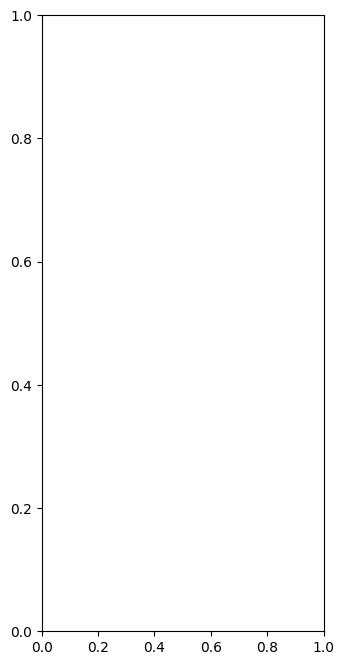

In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

IMAGE_SIZE = [299, 299]  # InceptionV3 specific input size
train_path = '/content/drive/My Drive/Dataset/train'
test_path = '/content/drive/My Drive/Dataset/val'

# Creating InceptionV3 Model
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in inception.layers:
    layer.trainable = False

x = Flatten()(inception.output)
x = Dense(256, activation='relu')(x)
prediction = Dense(7, activation='softmax')(x)
model = Model(inputs=inception.input, outputs=prediction)

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

# Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Train Test Split
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
)

test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
)

# Training Model
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=30,
    validation_steps=len(test_set)
)
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(range(30), acc, label='Training Accuracy')
plt.plot(range(30), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(30), loss, label='Training Loss')
plt.plot(range(30), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/yolov8/inceptionv3.h5')

In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/yolov8/inceptionv3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


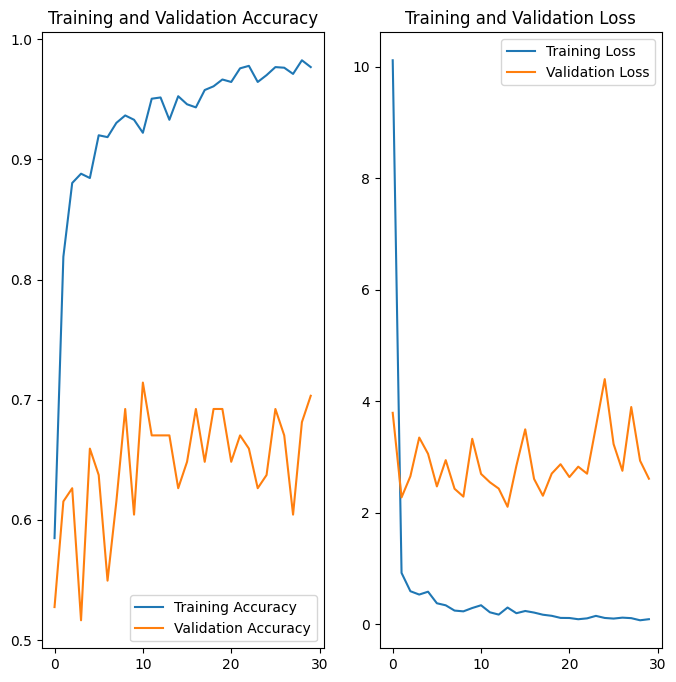

In [ ]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(range(30), acc, label='Training Accuracy')
plt.plot(range(30), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(30), loss, label='Training Loss')
plt.plot(range(30), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/yolov8/inceptionv3.h5')

87910968/87910968 [==============================] - 4s 0us/step
Found 986 images belonging to 2 classes.
Found 106 images belonging to 2 classes.


<ipython-input-2-0c6bc32a8c5d>:55: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/30
31/31 [==============================] - 459s 15s/step - loss: 13.2161 - accuracy: 0.7394 - val_loss: 4.0219 - val_accuracy: 0.8302
Epoch 2/30
31/31 [==============================] - 284s 9s/step - loss: 1.2119 - accuracy: 0.9189 - val_loss: 0.9780 - val_accuracy: 0.8868
Epoch 3/30
31/31 [==============================] - 301s 10s/step - loss: 0.5638 - accuracy: 0.9422 - val_loss: 0.4009 - val_accuracy: 0.9623
Epoch 4/30
31/31 [==============================] - 279s 9s/step - loss: 1.2019 - accuracy: 0.9077 - val_loss: 1.8717 - val_accuracy: 0.9245
Epoch 5/30
31/31 [==============================] - 304s 10s/step - loss: 0.7207 - accuracy: 0.9564 - val_loss: 1.4669 - val_accuracy: 0.9434
Epoch 6/30
31/31 [==============================] - 297s 10s/step - loss: 0.3970 - accuracy: 0.9706 - val_loss: 1.0218 - val_accuracy: 0.9434
Epoch 7/30
31/31 [==============================] - 278s 9s/step - loss: 0.6938 - accuracy: 0.9473 - val_loss: 1.3850 - val_accuracy: 0.9151
Epoch 8/

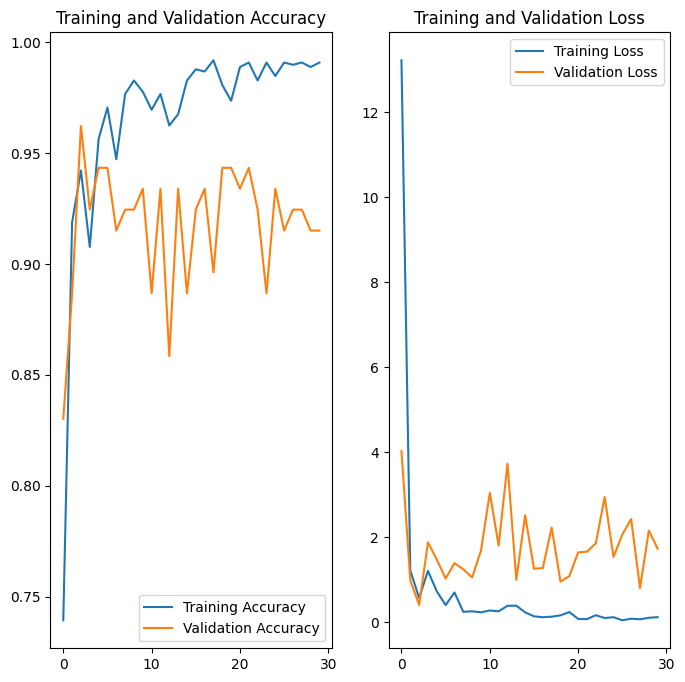

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

IMAGE_SIZE = [299, 299]  # InceptionV3 specific input size
train_path = '/content/drive/My Drive/Python/train'
test_path = '/content/drive/My Drive/Python/val'

# Creating InceptionV3 Model
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in inception.layers:
    layer.trainable = False

x = Flatten()(inception.output)
x = Dense(256, activation='relu')(x)
prediction = Dense(2, activation='softmax')(x)
model = Model(inputs=inception.input, outputs=prediction)

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

# Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Train Test Split
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
)

test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
)

# Training Model
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=30,
    validation_steps=len(test_set)
)
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(range(30), acc, label='Training Accuracy')
plt.plot(range(30), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(30), loss, label='Training Loss')
plt.plot(range(30), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/yolov8/inceptionv3.h5')

Found 986 images belonging to 2 classes.
Found 106 images belonging to 2 classes.


<ipython-input-4-5b9916675590>:55: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/30
31/31 [==============================] - 655s 21s/step - loss: 1.4885 - accuracy: 0.6937 - val_loss: 0.5693 - val_accuracy: 0.7547
Epoch 2/30
31/31 [==============================] - 622s 20s/step - loss: 0.2554 - accuracy: 0.9067 - val_loss: 0.2249 - val_accuracy: 0.9245
Epoch 3/30
31/31 [==============================] - 602s 20s/step - loss: 0.1665 - accuracy: 0.9493 - val_loss: 0.2210 - val_accuracy: 0.9057
Epoch 4/30
31/31 [==============================] - 626s 20s/step - loss: 0.1401 - accuracy: 0.9533 - val_loss: 0.2245 - val_accuracy: 0.8868
Epoch 5/30
31/31 [==============================] - 620s 20s/step - loss: 0.1052 - accuracy: 0.9716 - val_loss: 0.1710 - val_accuracy: 0.9245
Epoch 6/30
31/31 [==============================] - 622s 20s/step - loss: 0.0999 - accuracy: 0.9675 - val_loss: 0.1254 - val_accuracy: 0.9623
Epoch 7/30
31/31 [==============================] - 619s 20s/step - loss: 0.0889 - accuracy: 0.9675 - val_loss: 0.1261 - val_accuracy: 0.9717
Epoch 

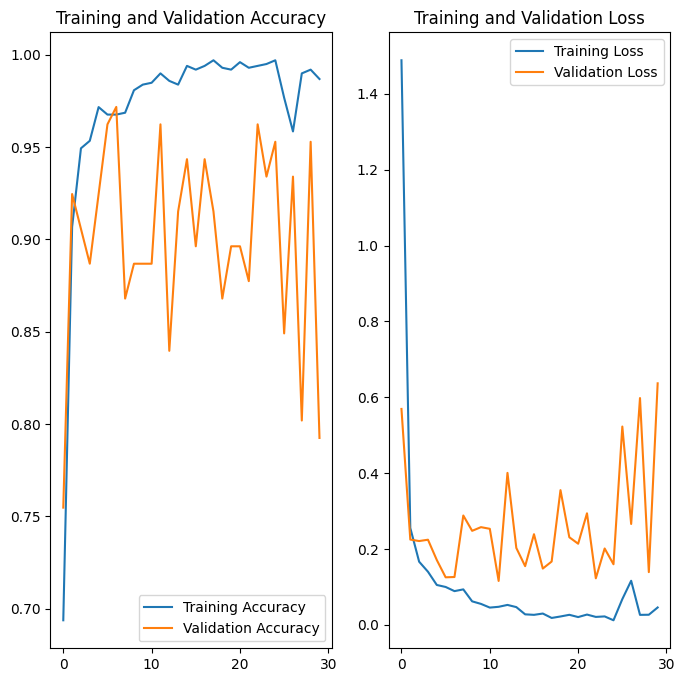

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

IMAGE_SIZE = [224, 224]  # InceptionV3 specific input size
train_path = '/content/drive/My Drive/Python/train'
test_path = '/content/drive/My Drive/Python/val'

# Creating InceptionV3 Model
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg16.layers:
    layer.trainable = False

x = Flatten()(vgg16.output)
x = Dense(256, activation='relu')(x)
prediction = Dense(2, activation='softmax')(x)
model = Model(inputs=vgg16.input, outputs=prediction)

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

# Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Train Test Split
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
)

test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
)

# Training Model
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=30,
    validation_steps=len(test_set)
)
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(range(30), acc, label='Training Accuracy')
plt.plot(range(30), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(30), loss, label='Training Loss')
plt.plot(range(30), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Python/vgg16t.h5')